You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,r2_score
import seaborn as sns

In [73]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label


In [74]:
x_l = x_l.reshape(2062, -1)

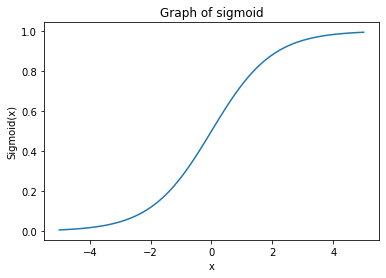

In [75]:
x = np.linspace(-5, 5, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel('x') 
plt.ylabel('Sigmoid(x)')
plt.title('Graph of sigmoid')
plt.show()

### Multiclass classification
**Logistic regression** can only be used for two class problems where the output label is binary like a **yes** or **no**, **true** or **false** case. To use Logistic Regression for multiple classes there are two methods that we can use :-
1. **One Vs One**: in this method we need to consider $K \choose 2$ classifiers *(K = number of classes)* one for each pair of classes. To build it we need to extract only those data point *(samples)* belonging to these classes. For testing we need to use all the $K \choose 2$ classifiers and count the frequencies for each class. Finally we predict the label *(class)* with the maximum frequency.
2. **One Vs All**: in this method we need to consider $K$ classifiers one for each class. For each classifier the data belonging to that class is labeled as 1 and everything else as 0, which converts it into a two class *(binary)* problem.

In [76]:
# Logistic Regression
class MyLogisticRegression:
    def __init__(self, train_data, Y):
        self.data = train_data  # It is assumed that data is normalized and shuffled (rows, cols)
        self.Y = Y[:, np.newaxis]
        self.b = np.random.randn()
        self.cols = self.data.shape[1]
        self.rows = self.data.shape[0]
        self.weights = np.random.randn(self.cols, 1)  # Initialising weights to 1, shape (cols, 1)
        self.num_iterations = 500
        self.learning_rate = 0.0001
        self.batch_size = 30
    
    @staticmethod
    def sigmoid(x):
        return 1/(1 + np.exp(-x))
        
    def calc_mini_batches(self):
        new_data = np.hstack((self.data, self.Y))
        np.random.shuffle(new_data)
    
        rem = self.rows % self.batch_size
        num = self.rows // self.batch_size
        till = self.batch_size * num
        if num > 0:
            dd = np.array(np.vsplit(new_data[ :till, :], num))
            X_batch = dd[:, :, :-1]
            Y_batch = dd[:, :, -1]
            
        return X_batch, Y_batch

    def update_weights(self, X, Y):
        Y_predicted = self.predict(X) # Remember that X has data stored along the row for one sample
        gradient = np.dot(np.transpose(X), Y_predicted - Y)
        self.b = self.b - np.sum(Y_predicted - Y)
        self.weights = self.weights - (self.learning_rate * gradient) # vector subtraction
    
    def print_error(self):
        Y_Predicted = self.predict(self.data)
        class_one = self.Y == 1
        class_two = np.invert(class_one)
        val = np.sum(np.log(Y_Predicted[class_one]))
        val += np.sum(np.log(1 - Y_Predicted[class_two]))
        print(-val)
    
    def gradient_descent(self):
        for j in range(self.num_iterations):
            X, Y = self.calc_mini_batches()
            num_batches = X.shape[0]
            for i in range(num_batches):
                self.update_weights(X[i, :, :], Y[i, :][:, np.newaxis])  # update the weights
            if (j+1)%100 == 0:
                self.print_error()
    
    def predict(self, X):
        # X is 2 dimensional array, samples along the rows
        return self.sigmoid(np.dot(X, self.weights) + self.b)

In [64]:
log_regressors_ova = []
for i in range(4):
    mask = y_l[:,i] >= 1.0 - 1e-6
    others = np.invert(mask)
    x_pos = x_l[mask]
    x_neg = x_l[others]
    y_pos = [1]*len(x_pos)
    y_neg = [0]*len(x_neg)
    y_new = y_pos + y_neg
    y_new = np.array(y_new)
    x_new = np.vstack((x_pos, x_neg))
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.30, shuffle=True)
    reg = MyLogisticRegression(x_train, y_train)
    reg.gradient_descent()
    y_pred = reg.predict(x_test)
    pred = y_pred >= 0.5
    pred = pred.astype(int)
    print('accuracy : {a}'.format(a=accuracy_score(y_test, pred)))
    print('f1 score : {a}'.format(a = f1_score(y_test, pred)))
    log_regressors_ova.append(reg)

1165.6003822929379
728.3022847219468
897.434189968287
718.1614823861232
541.7357048510157
accuracy : 0.8933764135702746
f1 score : 0.5875
1125.22289014278
507.0089105969695
389.82620626449386
332.15433633560974
344.6483942547981
accuracy : 0.9079159935379645
f1 score : 0.6013986013986015
1387.912459129495
830.1712256267981
678.2564383728258
828.8724523414282
585.7797020836076
accuracy : 0.9159935379644588
f1 score : 0.4090909090909091
1100.0230808978768
1219.198878086387
670.2652729785949
516.3086532919759
462.875285611696
accuracy : 0.8723747980613893
f1 score : 0.40601503759398494


In [70]:
from sklearn.linear_model import LogisticRegression
for i in range(4):
    mask = y_l[:,i] >= 1.0 - 1e-6
    others = np.invert(mask)
    x_pos = x_l[mask]
    x_neg = x_l[others]
    y_pos = [1]*(x_pos.shape[0])
    y_neg = [0]*(x_neg.shape[0])
    y_new = y_pos + y_neg
    y_new = np.array(y_new)
    x_new = np.vstack((x_pos, x_neg))
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.30, shuffle=True)
    clf = LogisticRegression(random_state=0, max_iter=1000)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    print('accuracy : {a}'.format(a=accuracy_score(y_test, pred)))
    print('f1 score : {a}'.format(a = f1_score(y_test, pred)))
    log_regressors_ova.append(reg)

accuracy : 0.9644588045234249
f1 score : 0.8070175438596492
accuracy : 0.9741518578352181
f1 score : 0.8596491228070176
accuracy : 0.9192245557350566
f1 score : 0.5535714285714286
accuracy : 0.9353796445880452
f1 score : 0.6153846153846153


In [79]:
log_regressors_ovo = []
for i in range(3):
    for j in range(i+1,3):
        mask1 = (y_l[:, i] >= 1.0 - 1e-6)
        mask0 = (y_l[:, j] >= 1.0 - 1e-6)
        x_pos = x_l[mask1]
        x_neg = x_l[mask0]
        y_pos = [1]*(x_pos.shape[0])
        y_neg = [0]*(x_neg.shape[0])
        y_new = y_pos + y_neg
        y_new = np.array(y_new)
        x_new = np.vstack((x_pos, x_neg))
        x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.30, shuffle=True)
        reg = MyLogisticRegression(x_train, y_train)
        reg.gradient_descent()
        y_pred = reg.predict(x_test)
        pred = y_pred >= 0.5
        pred = pred.astype(int)
        print('accuracy : {a}'.format(a=accuracy_score(y_test, pred)))
        print('f1 score : {a}'.format(a = f1_score(y_test, pred)))
        log_regressors_ovo.append(reg)

125.18939498695491
72.17231030451674
67.88859433188675
40.25629449357726
42.597256494975284
accuracy : 0.943089430894309
f1 score : 0.9465648854961831
473.81108211519916
248.75873266800244
243.98164297293656
141.059886483292
109.35743965364318
accuracy : 0.8048780487804879
f1 score : 0.8064516129032259
367.39995504803807
212.59565219221435
157.6712682819209
128.88749352247106
106.63371395983012
accuracy : 0.9032258064516129
f1 score : 0.9


In [ ]:
ind = 0
for i in range(3):
    for j in range(i+1, 3):
        